# DAP3 - Classification 
### John Munar and Jack Witt
We first explore the models themsevles (kNN, Bayes, D-Tree) and find what we observed to be the optimal parameters. Next, we created a data structue of our models with our chosen parameters, and conducted 10-fold cross validation to ensure our models were as accurate as possible. Finally, we conducted basic performance metrics for each of the models, using a confusion matrix, performance report, and ROC curves where applicable.

## Imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# d-tree features
from graphviz import Source
from sklearn.tree import export_graphviz

In [2]:
# show confusion matrix - written by dr bae
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [3]:
# show most important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [4]:
# grab data and split
df = pd.read_csv("../DAP2/processeddata/2018_Financial_Data.csv", index_col=0)
target_cols = ['priceCashFlowRatio', 
               'priceEarningsRatio', 
               'priceEarningsToGrowthRatio', 
               'priceBookValueRatio', 
               'currentRatio', 
               'quickRatio',
               'payoutRatio']
X = df[target_cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# create cv
kf = KFold(n_splits=10, random_state=None, shuffle=True) 

# Hyper-Parameter Finding

### KNN Model 

Highest Accuracy: 0.7562908170065308 at k = 15


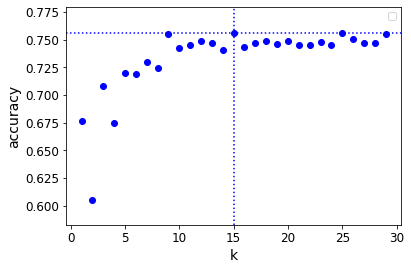

In [10]:
# plot to store scores and show maxima
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(['avg cv acc. on regularized data'])

# find optimal k 
k_range = range(1,30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    s_temp = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        cv_X_train = X_train_scaled[train_index]
        cv_X_val   = X_train_scaled[val_index]
        cv_y_train = y_train.iloc[train_index]
        cv_y_val   = y_train.iloc[val_index]
        
        knn.fit(cv_X_train, cv_y_train)
        s_temp.append(knn.score(cv_X_val, cv_y_val))
    
    # plot mean cv performance
    scores.append(np.mean(s_temp))
    
# plot maximum
plt.scatter(k_range, scores, c='b')
m = max(scores)
m_index = scores.index(m)+1
plt.axvline(x=m_index, color='b', linestyle=':')
plt.axhline(y=m, color='b', linestyle=':')
print('Highest Accuracy:',m,'at k =',m_index)
OPTIMAL_K = m_index

### Decision Tree (Entropy)

Highest Accuracy: 0.752165800346528 at k = 2


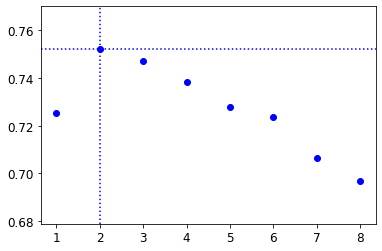

In [61]:
# find optimal depth 
depth_range = range(1, len(target_cols)+2)
scores = []
for d in depth_range:
    tree = DecisionTreeClassifier(max_depth=d, criterion='entropy')
    cv_scores = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        cv_X_train = X_train.iloc[train_index]
        cv_X_val   = X_train.iloc[val_index]
        cv_y_train = y_train.iloc[train_index]
        cv_y_val   = y_train.iloc[val_index]
        
        tree.fit(cv_X_train, cv_y_train)
        cv_scores.append(tree.score(cv_X_val, cv_y_val))
    
    # plot mean cv performance
    scores.append(np.mean(cv_scores))
    
# plot maximum
plt.scatter(depth_range, scores, c='b')
m = max(scores)
m_index = scores.index(m)+1
plt.axvline(x=m_index, color='b', linestyle=':')
plt.axhline(y=m, color='b', linestyle=':')
print('Highest Accuracy:',m,'at k =',m_index)
OPTIMAL_ENT_DEPTH = m_index

### Decision Tree (Gini)

Highest Accuracy: 0.7530854324936692 at k = 2


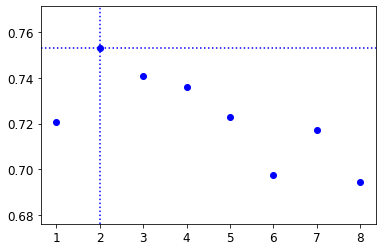

In [62]:
# find optimal depth 
scores = []
for d in depth_range:
    tree = DecisionTreeClassifier(max_depth=d, criterion='gini')
    cv_scores = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        cv_X_train = X_train.iloc[train_index]
        cv_X_val   = X_train.iloc[val_index]
        cv_y_train = y_train.iloc[train_index]
        cv_y_val   = y_train.iloc[val_index]
        
        tree.fit(cv_X_train, cv_y_train)
        cv_scores.append(tree.score(cv_X_val, cv_y_val))
    
    # plot mean cv performance
    scores.append(np.mean(cv_scores))
    
# plot maximum
plt.scatter(depth_range, scores, c='b')
m = max(scores)
m_index = scores.index(m)+1
plt.axvline(x=m_index, color='b', linestyle=':')
plt.axhline(y=m, color='b', linestyle=':')
print('Highest Accuracy:',m,'at k =',m_index)
OPTIMAL_GI_DEPTH = m_index

# Finding Optimal Size of Training Data

In [63]:
# create dict of classifiers 
cls = {
    'KNN'        : KNeighborsClassifier(n_neighbors=OPTIMAL_K),
    'NB'         : GaussianNB(),
    'DT_entropy' : DecisionTreeClassifier(max_depth=OPTIMAL_ENT_DEPTH, criterion='entropy'),
    'DT_gini'    : DecisionTreeClassifier(max_depth=OPTIMAL_GI_DEPTH, criterion='gini')
}

In [64]:
# find the optimal training partitions
partitions = [0.6, 0.7, 0.8]
reports = {}
for p in partitions: 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p, random_state=0)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for cl in cls:  
        cls[cl].fit(X_train_scaled, y_train)
        prediction = cls[cl].predict(X_test_scaled)
        report = classification_report(prediction, y_test)
    
        print(cl,'training on',str(100*p)+'%','of data\n',report)

KNN training on 60.0% of data
               precision    recall  f1-score   support

           0       0.26      0.49      0.34        85
           1       0.91      0.79      0.85       570

    accuracy                           0.75       655
   macro avg       0.59      0.64      0.59       655
weighted avg       0.83      0.75      0.78       655

NB training on 60.0% of data
               precision    recall  f1-score   support

           0       0.36      0.47      0.41       126
           1       0.86      0.81      0.83       529

    accuracy                           0.74       655
   macro avg       0.61      0.64      0.62       655
weighted avg       0.77      0.74      0.75       655

DT_entropy training on 60.0% of data
               precision    recall  f1-score   support

           0       0.33      0.37      0.35       145
           1       0.81      0.79      0.80       510

    accuracy                           0.69       655
   macro avg       0.57      

We observed that the KNN and both Decision Trees performed most accurately training on 80% of the data, whereas the Naive Bayes performed most accurately on 70% of the data. 

# Model Evaluation
Now that we have our optimal parameters, we can begin evaluating our models.

### Confusion Matrices

KNN 
 [[ 22  56]
 [ 21 229]]


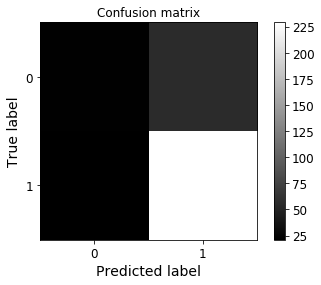

NB 
 [[ 23  55]
 [ 35 215]]


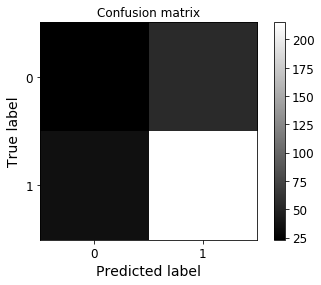

DT_entropy 
 [[ 13  65]
 [ 14 236]]


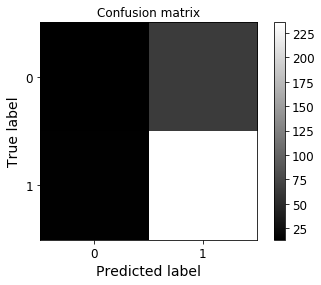

DT_gini 
 [[ 14  64]
 [  8 242]]


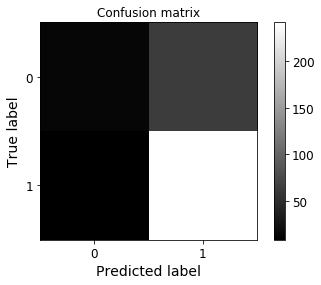

In [65]:
# create new evaluation split using optimal partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# confusion matrix 
for cl in cls: 
    cls[cl].fit(X_train_scaled, y_train)
    y_pred = cls[cl].predict(X_test_scaled)

    # create and plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(cl,'\n',confusion_mat)
    plot_confusion_matrix(confusion_mat, 2)

### ROC Curves

KNN Accuracy =  0.7134358974358973


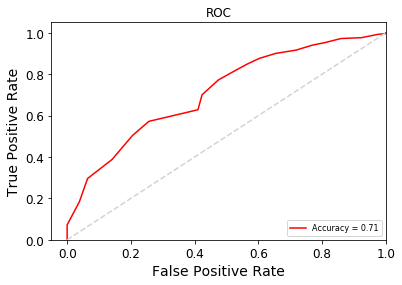

NB Accuracy =  0.7034871794871795


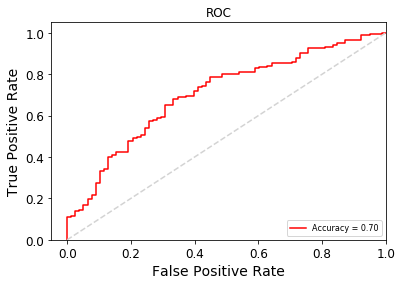

DT_entropy Accuracy =  0.6626410256410256


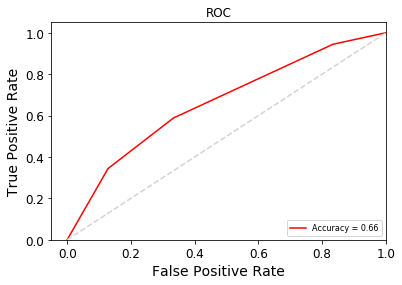

DT_gini Accuracy =  0.6837948717948718


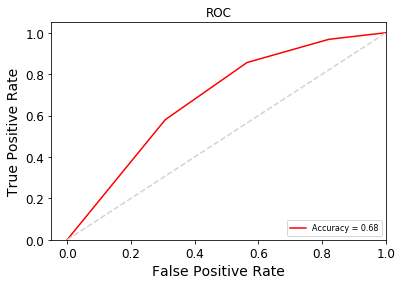

In [66]:
# roc curves 
for cl in cls: 
    y_pred = cls[cl].predict_proba(X_test_scaled)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(cl,'Accuracy = ', roc_auc)

    # Plotting
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c='r', label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Important Features

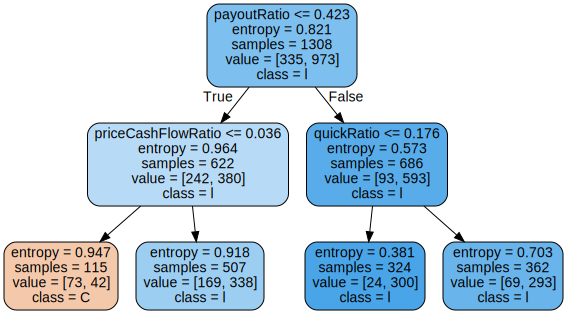

In [67]:
# decision trees important features (entropy)
export_graphviz(
        cls['DT_entropy'],
        out_file="entropy.dot",
        feature_names=target_cols,
        class_names='Class',
        rounded=True,
        filled=True
    )
Source.from_file("entropy.dot")

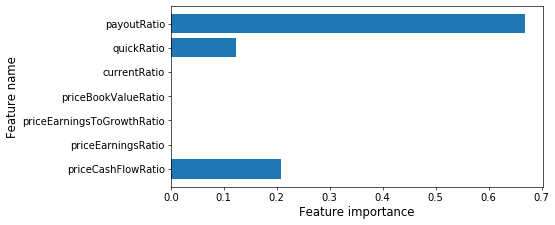

Feature importances: [0.20812567 0.         0.         0.         0.         0.1229966
 0.66887773]


In [68]:
# label important features
plt.figure(figsize=(8,4), dpi=60)
plot_feature_importances(cls['DT_entropy'], target_cols)
plt.show()
print('Feature importances: {}'.format(cls['DT_entropy'].feature_importances_))

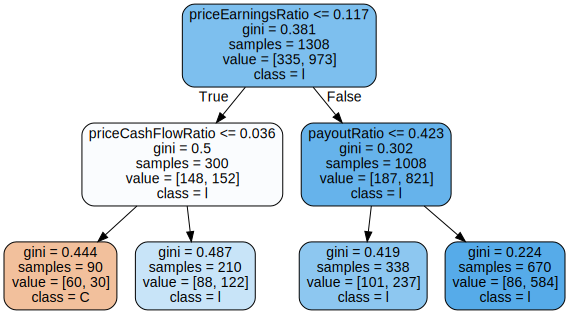

In [69]:
# decision trees important features (gini)
export_graphviz(
        cls['DT_gini'],
        out_file="gini.dot",
        feature_names=target_cols,
        class_names='Class',
        rounded=True,
        filled=True
    )
Source.from_file("gini.dot")

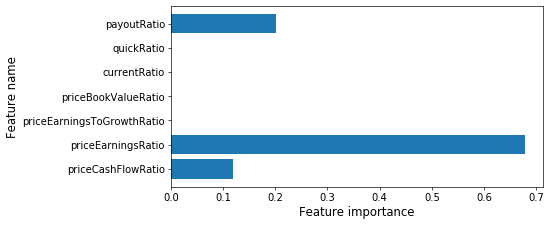

Feature importances: [0.11960591 0.67827302 0.         0.         0.         0.
 0.20212106]


In [70]:
# label important features
plt.figure(figsize=(8,4), dpi=60)
plot_feature_importances(cls['DT_gini'], target_cols)
plt.show()
print('Feature importances: {}'.format(cls['DT_gini'].feature_importances_))

In summary, the decision trees identified their most important features. These features varied somewhat but both trees deemed that the priceCashFlowRatio to be partially important in classification.

### Learning Curves

KNN learning curve
NB learning curve
DT_entropy learning curve
DT_gini learning curve


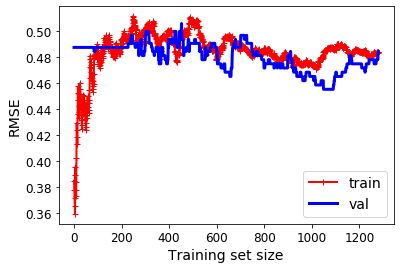

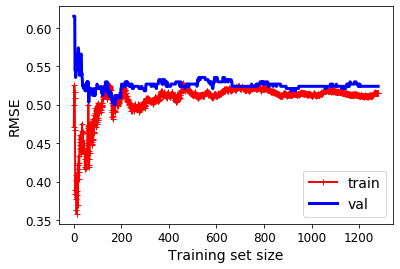

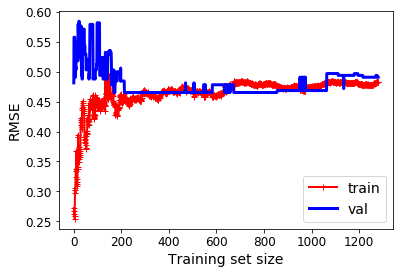

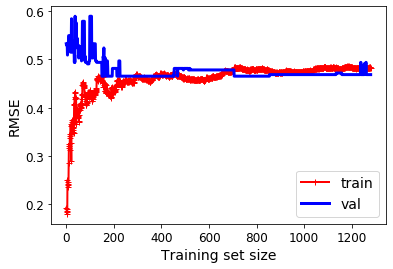

In [76]:
# plot a learning curve for each model
for cl in cls: 
    train_errors, test_errors = [], []
    plt.figure()
    
    for m in range(OPTIMAL_K, len(X_train)):
        cls[cl].fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = cls[cl].predict(X_train_scaled[:m])
        y_test_predict = cls[cl].predict(X_test_scaled)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    print(cl,"learning curve")
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="lower right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

# Summary and Discussion 

It appears that the kNN model performs slightly better than the other three, yet they all perform about the same on average. They all have a very similar accuracy and performance - indicated by the confusion matrices, classification reports, and ROC curves. From our performance results (classification reports) we can see that class 0 has much lower precision and recall as compared to class 1, with recall being the lower of the two. We believe this is due to the skew of positive to negative classes within our dataset.  

When finetuning our hyper-parameters, we found the optimal to be: kNN ~27 neighbors, Decision Tree (Entropy) - Depth of 2, and Decision Tree (Gini) - Depth of 2. In the entropy decision tree, it appears the payoutRatio is the most important feature, given it is the root node of the tree and shown by the feature importance graph. In the gini decision tree, it appears that the priceEarningsRatio is the most important. However, in both decision trees most of our attributes (over half) were given 0 weight and thus did not affect the classification label. In the future, we could potentially use this information to eliminate the similarly ignored features. 

In conclusion, we feel our models performed decently given the observed skew of the data. In order to increase performance, we would have to investigate other relevant attributes with regards to stock trading and balance or re-sample our dataset.  